In [614]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

The Differential equations are
\begin{equation}
    \ddot{x}  = x\Omega^2 +2\dot{y}\Omega - \frac{\mu_1 (x+f)}{((x+f)^2+y^2)^{3/2}} -\frac{\mu_2 (x-(1-f))}{((x-(1-f))^2+y^2)^{3/2}}
\end{equation}

\begin{equation}
    \ddot{y} = y\Omega^2 - 2\dot{x}\Omega - \frac{\mu_1 y}{((x+f)^2+y^2)^{3/2}} -\frac{\mu_2 y}{((x-(1-f))^2+y^2)^{3/2}}
\end{equation}

In [615]:
def model_3body(z,t, Omega, mu):
    x = z[0]
    vx = z[1]
    y = z[2]
    vy = z[3]
    dxdt = vx
    dydt = vy
    dvxdt = x*Omega**2 + 2*vy*Omega - (x + mu)/((x+mu)**2+y**2)**1.5 - (mu*(x-1+mu))/((x-1+mu)**2+y**2)**1.5
    dvydt = y*Omega**2 - 2*vx*Omega - y/((x+mu)**2+y**2)**1.5 - (mu*y)/((x-1+mu)**2+y**2)**1.5
    dzdt = [dxdt, dvxdt, dydt, dvydt]
    return dzdt

Example 1: a moon

1.9990044920159957
3.4939089840319912


array([0.71      , 0.70657392, 0.70951962, ..., 0.71792461, 0.71942609,
       0.71684626])

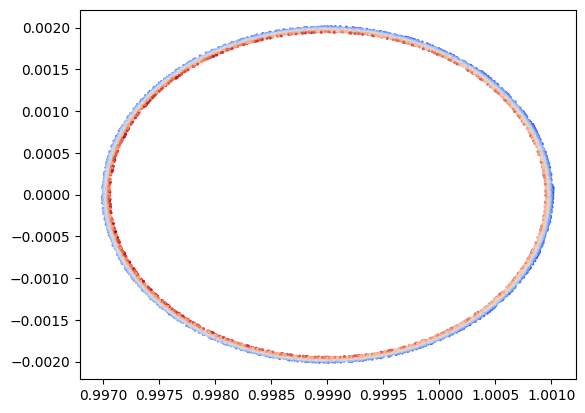

In [616]:
Nout = 10000
t = np.linspace(0, 100, Nout+1)
Omega = 1
mu = 1e-3
z0 = [1.001, 0, 0, -0.71]
z = odeint(model_3body,z0,t, args=(Omega, mu))
Nout = len(t)
x = z[:,0]
y = z[:,2]
v = np.sqrt(z[:,1]**2 + z[:,3]**2)
v1 = v/np.max(v)
plt.scatter(x, y, s =1, c = v1, cmap = "coolwarm")
U = Omega**2/2*(z0[0]**2+z0[2]**2) + 1/((z0[0]+mu)**2+z0[2]**2)**0.5 + mu/((z0[0]-1+mu)**2+z0[2]**2)**0.5
J_0 = 2*U - z0[1]**2 - z0[3]**2
print (U)
print (J_0)
v


Example 2: A Trojan

1.5005003753117732
3.0010007506235463
0.0
0.0020242291159939057


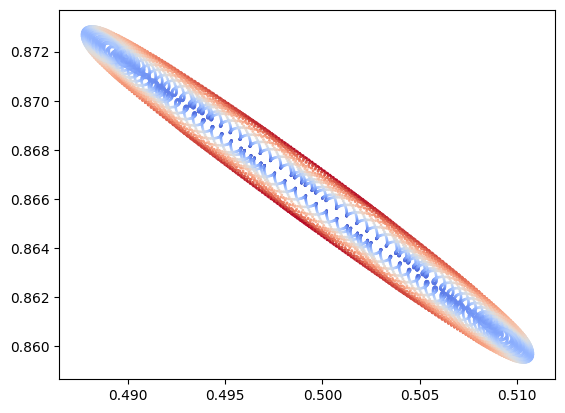

In [613]:
Nout = 10000
t = np.linspace(0, 1000, Nout+1)
Omega = 1
mu = 1e-3
z0 = [0.5, 0, np.sqrt(3)/2, 0]
z = odeint(model_3body,z0,t, args=(Omega, mu))
Nout = len(t)
x = z[:,0]
y = z[:,2]
v = np.sqrt(z[:,1]**2 + z[:,3]**2)
v1 = v/np.max(v)
plt.scatter(x, y, s = 1, c = v1, cmap = "coolwarm")
U = Omega**2/2*(z0[0]**2+z0[2]**2) + 1/((z0[0]+mu)**2+z0[2]**2)**0.5 + mu/((z0[0]-1+mu)**2+z0[2]**2)**0.5
J_0 = 2*U - z0[1]**2 - z0[3]**2
print (U)
print (J_0)
print(np.min(v))
print(np.max(v))

Example 3: A horseshoe orbit

1.501527438250988
3.003054876501976
0.0
0.18555401663365645


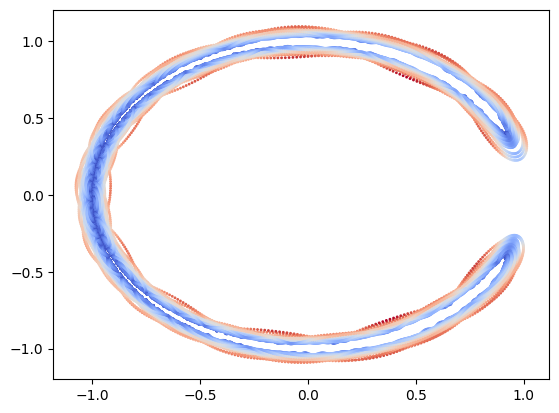

In [617]:
Nout = 100000
t = np.linspace(0, 10000, Nout+1)
Omega = 1
mu = 1e-3
z0 = [-1.005, 0, 0, 0]
z = odeint(model_3body,z0,t, args=(Omega, mu))
Nout = len(t)
x = z[:,0]
y = z[:,2]
v = np.sqrt(z[:,1]**2 + z[:,3]**2)
v1 = v/np.max(v)
plt.scatter(x, y, s = 1, c = v1, cmap = "coolwarm")
U = Omega**2/2*(z0[0]**2+z0[2]**2) + 1/((z0[0]+mu)**2+z0[2]**2)**0.5 + mu/((z0[0]-1+mu)**2+z0[2]**2)**0.5
J_0 = 2*U - z0[1]**2 - z0[3]**2
print (U)
print (J_0)
print(np.min(v))
print(np.max(v))